# EDA_factores_nivel_ingresos Analisis bivariante

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [76]:
import sys
import os

# Add src folder to Python path
sys.path.append(os.path.abspath(".."))

from utils import funciones
from utils import bootcampviztools
from utils.funciones import variabilidad
from utils.bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_categorical_relationship_fin, plot_multiple_boxplots, plot_combined_graphs, plot_grouped_boxplots,plot_grouped_histograms

In [77]:
df_adult_clean = pd.read_csv("../data/adult_clean.csv")

In [78]:
df = df_adult_clean

## Education VS Income 

### Education <-> Education_num mapping

The variable education_num is an ordinal numeric encoding of the categorical variable education, representing increasing levels of educational.

| education    | education_num |
| ------------ | ------------- |
| Preschool    | 1             |
| 1st–4th      | 2             |
| 5th–6th      | 3             |
| 7th–8th      | 4             |
| 9th          | 5             |
| 10th         | 6             |
| 11th         | 7             |
| 12th         | 8             |
| HS-grad      | 9             |
| Some-college | 10            |
| Assoc-voc    | 11            |
| Assoc-acdm   | 12            |
| Bachelors    | 13            |
| Masters      | 14            |
| Prof-school  | 15            |
| Doctorate    | 16            |


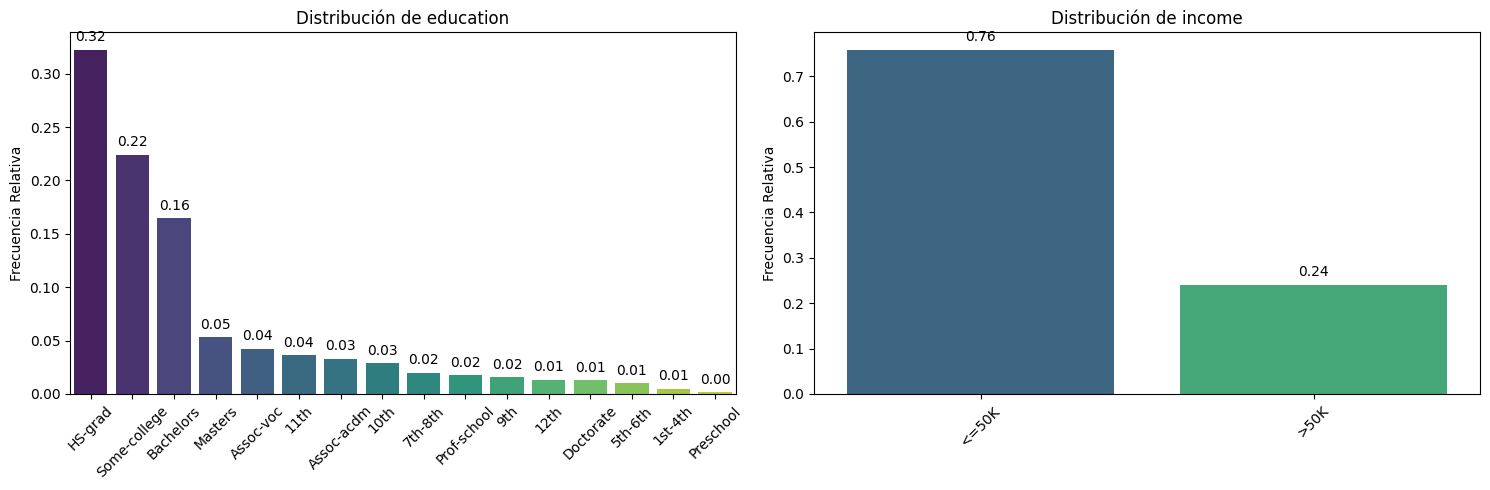

In [79]:
pinta_distribucion_categoricas(df,["education","income"], relativa=True,mostrar_valores=True)

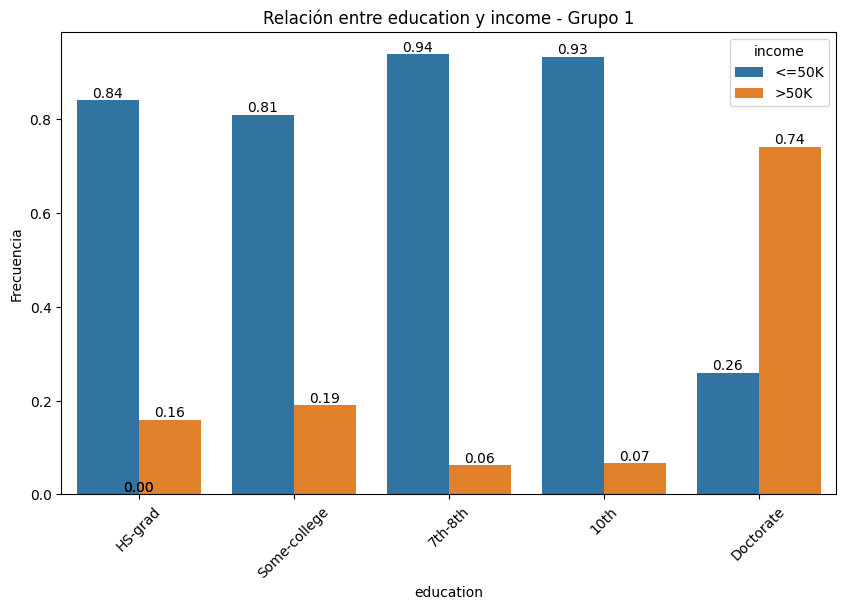

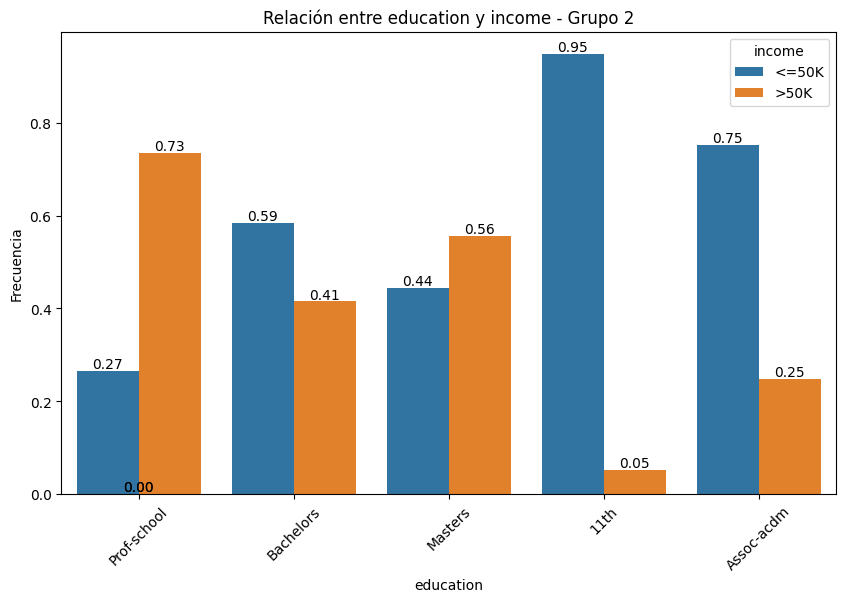

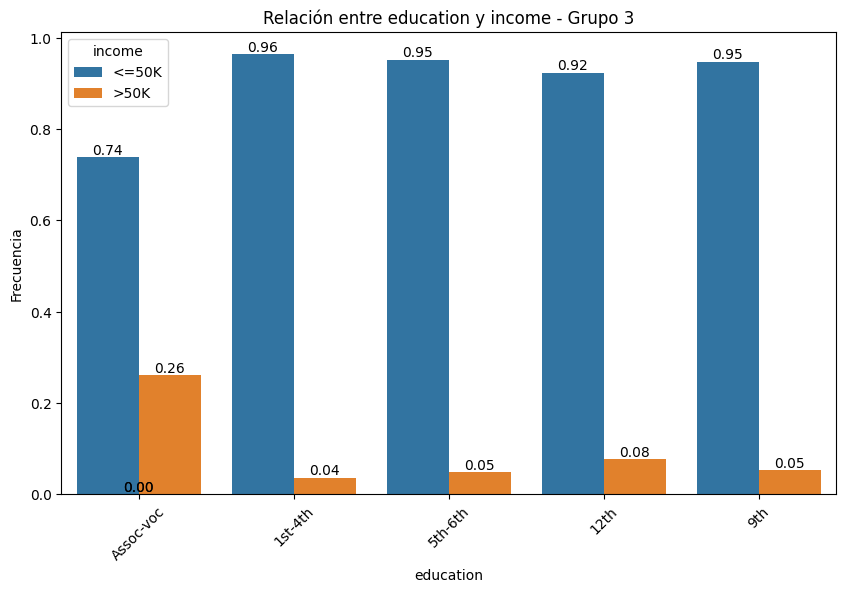

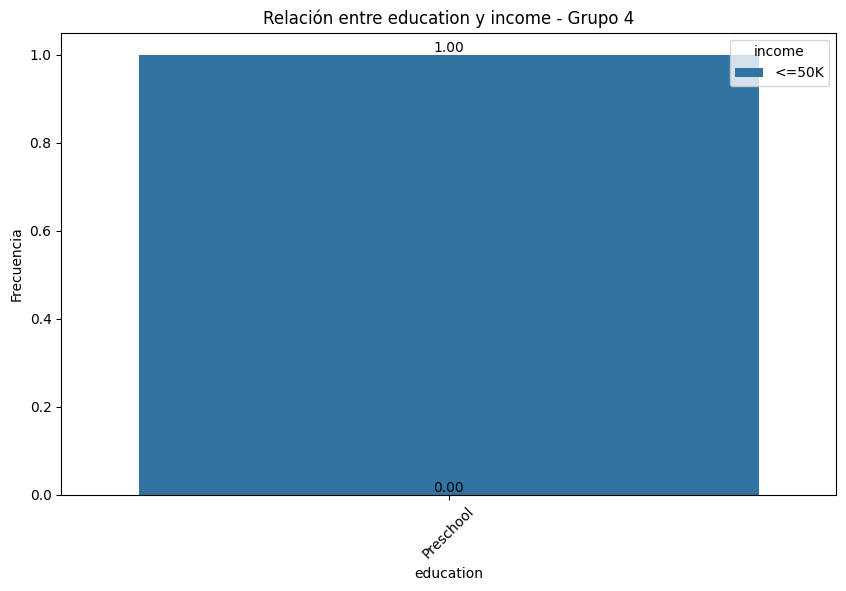

In [80]:
plot_categorical_relationship_fin(df,"education","income", show_values=True, relative_freq=True)

In [81]:
def tabla_contingencia(df,col1,col2):
    tabla_contingencia = pd.crosstab(df[col1], df[col2])
    return tabla_contingencia

In [82]:
tabla_cont = tabla_contingencia(df,"income","education")
tabla_cont

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
income,,,,,,,,,,,,,,,,
<=50K,871,1115,400,160,316,605,487,802,1021,3132,107,8820,763,50,153,5896
>50K,62,60,33,6,16,40,27,265,361,2221,306,1674,959,0,423,1386


In [83]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_cont)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 4428.4046875547865
P-Value: 0.0
Grados de Libertad: 15
Tabla de Frecuencias Esperadas:
 [[ 708.21630759  891.91228448  328.67916526  126.00633125  252.01266251
   489.60291361  390.16418232  809.93226173 1049.0406614  4063.32464579
   313.49767956 7965.72554323 1307.12591819   37.95371423  437.22678796
  5527.5789409 ]
 [ 224.78369241  283.08771552  104.32083474   39.99366875   79.98733749
   155.39708639  123.83581768  257.06773827  332.9593386  1289.67535421
    99.50232044 2528.27445677  414.87408181   12.04628577  138.77321204
  1754.4210591 ]]


#### Notes
* Higher education levels are linked to a higher chance of earning more than $50K.
* People with lower education levels mostly earn $50K or less.
* Individuals with a Bachelor’s degree or higher are much more likely to be in the higher income group.
* Advanced degrees such as Doctorate and Professional School show the strongest association with high income.
* Intermediate education levels improve income prospects but do not guarantee higher earnings.
* Overall, education plays a major role in income differences.

## Age VS Income

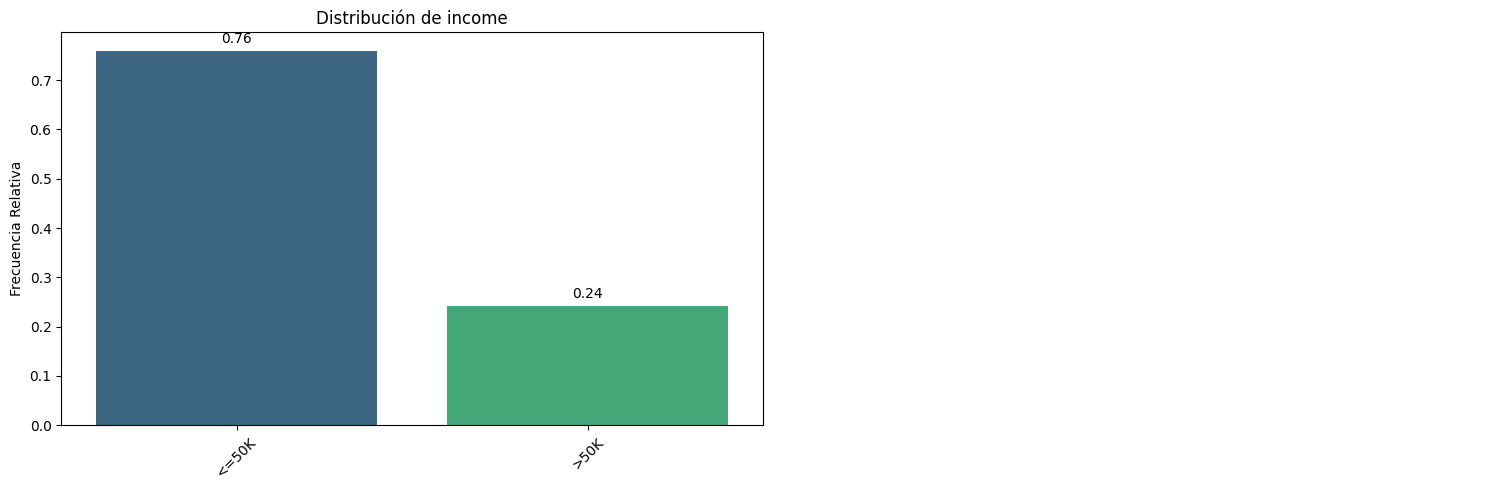

In [84]:
pinta_distribucion_categoricas(df,["income"],relativa=True,mostrar_valores=True)

(2,)


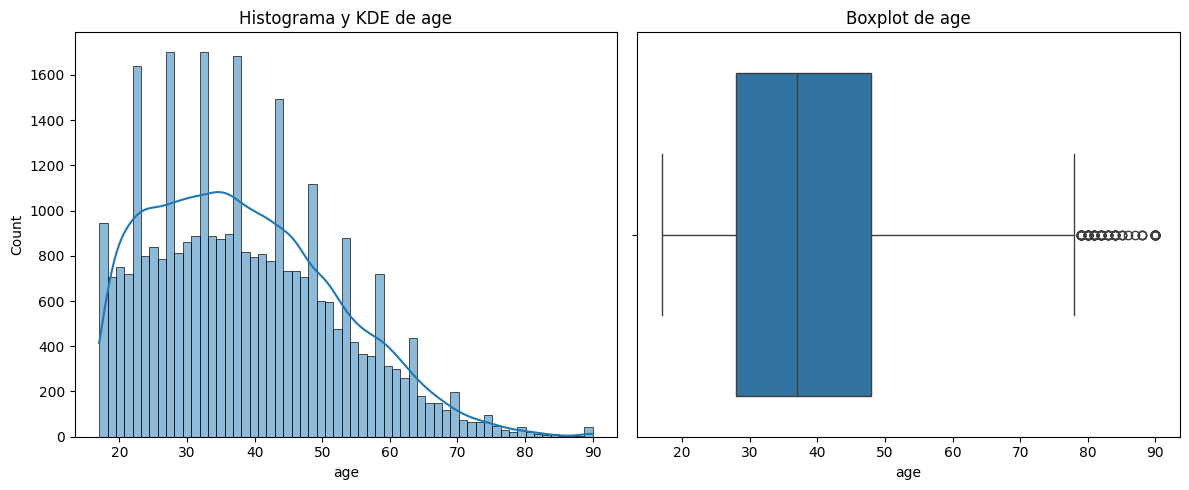

In [85]:
plot_combined_graphs(df,["age"])

In [86]:
# Show grouped statistical summary of variables
df.groupby("income")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24698.0,36.787392,14.017335,17.0,25.0,34.0,46.0,90.0
>50K,7839.0,44.250925,10.520102,19.0,36.0,44.0,51.0,90.0


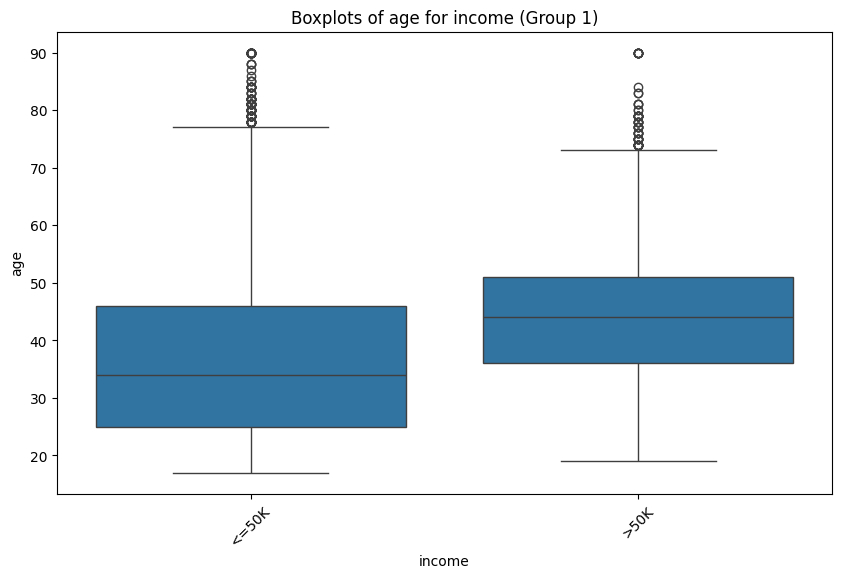

In [87]:
# plot boxplots
plot_grouped_boxplots(df,"income","age")

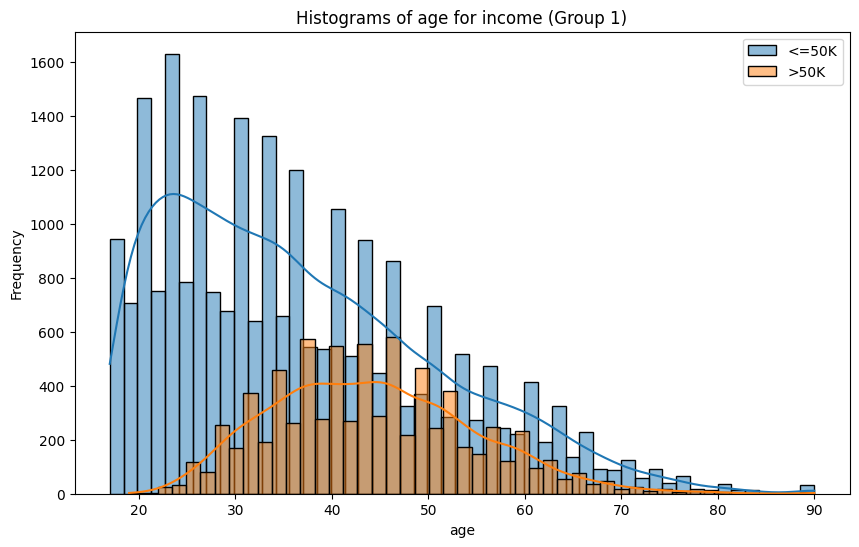

In [88]:
# plot histograms
plot_grouped_histograms(df,"income","age",2)

In [89]:
# import mannwhitneyu from scipy.stats
from scipy.stats import mannwhitneyu

In [90]:
# create two groups to use for the mannwhitneyu function

low_income = df.loc[df["income"] == "<=50K"]["age"]
high_income = df.loc[df["income"] == ">50K"]["age"]

In [91]:
# apply test
u_stat, p_valor = mannwhitneyu(low_income, high_income)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 61147488.0
Valor p: 0.0


### Notes "age" VS "income"

* In the statistical summary we can see that the group earning more than 50K has a higher age average than those that earn less than 50K
* The median age for the high income group is 44 years compared to 34 years for the low income group.
* While both groups include older individuals ( up to 90 yrs ), we can see that younger age groups are more common in the lower income group.
* Applying the Mann-Whitney U test returns a p value of <0.001 which reaffirms our visual conclusions and shows that there is a significant statistical association between the variable age and income.
* This association likely reflects increased experience over time and career progression.

## "binned_hours_per_week" VS "income"

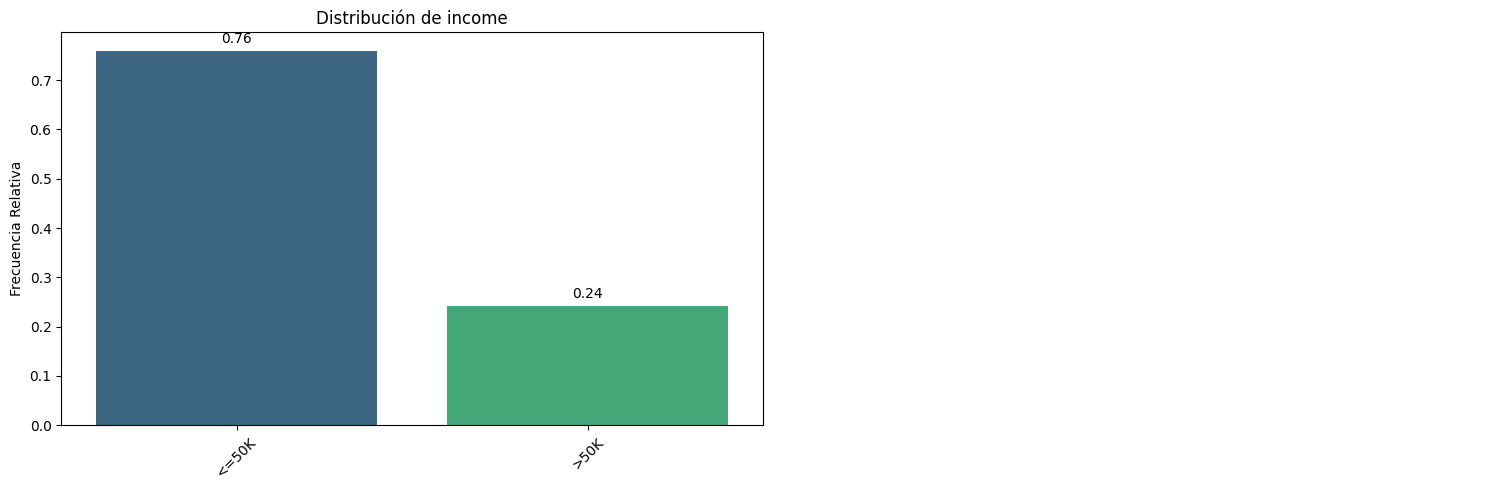

In [92]:
pinta_distribucion_categoricas(df,["income"],relativa=True,mostrar_valores=True)

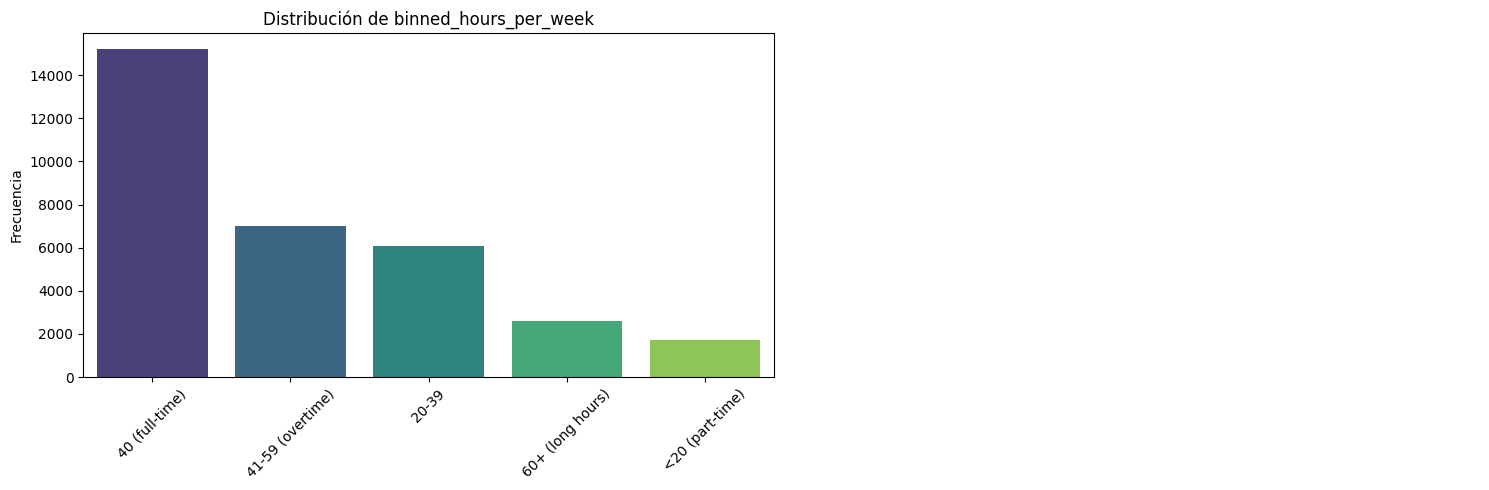

In [93]:
pinta_distribucion_categoricas(df,["binned_hours_per_week"])

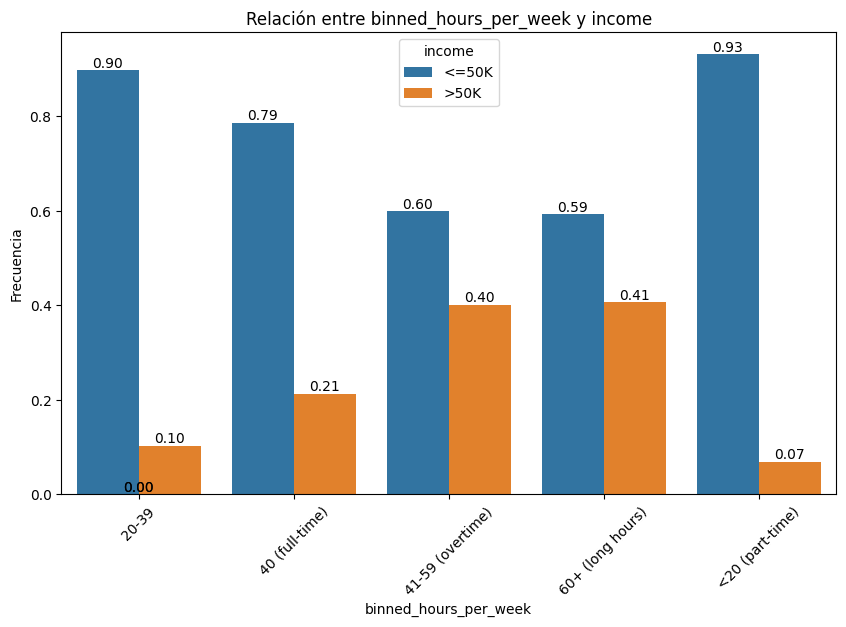

In [94]:
# use binned hours per week to compare variables.
bootcampviztools.plot_categorical_relationship_fin(df,"binned_hours_per_week","income",relative_freq=True,show_values=True)

In [95]:
tabla_cont_hours = tabla_contingencia(df,"binned_hours_per_week","income")
tabla_cont_hours

income,<=50K,>50K
binned_hours_per_week,,
20-39,5436,621
40 (full-time),11958,3246
41-59 (overtime),4188,2803
60+ (long hours),1533,1052
<20 (part-time),1583,117


In [96]:
chi2, p, dof, expected = chi2_contingency(tabla_cont_hours)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 2340.7926138402017
P-Value: 0.0
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[ 4597.71294219  1459.28705781]
 [11540.96542398  3663.03457602]
 [ 5306.68832406  1684.31167594]
 [ 1962.20702585   622.79297415]
 [ 1290.42628392   409.57371608]]


### Notes "binned_hours_per_week" VS "income"

* We see that bins with less working hours ( part-time) are dominated by the lower income group, even the full time group is dominated by the lower income group, however there we begin to see a rise in the higher income group.
* It is in the longer working hours "overtime" and "long hours" where we see a significant increase in the frequency of the higher income group.
* These finding are likely related to typical labor dynamics:
    + Part time work limits earnings, usually involving hourly or lower wage roles
    + Full time and overtime roles typically offer higher pay, usually involving salaried postiions
    + Longer hours are typically associated with managerial roles or professional occupations and more likely to exceed income thresholds

* The chi2 test returns a p value of <0.001 which shows a significant statistical association.
* The results show that income proportions shift consistently and substantially across working hour categories, reflecting structured labor market dynamics rather than a random variation

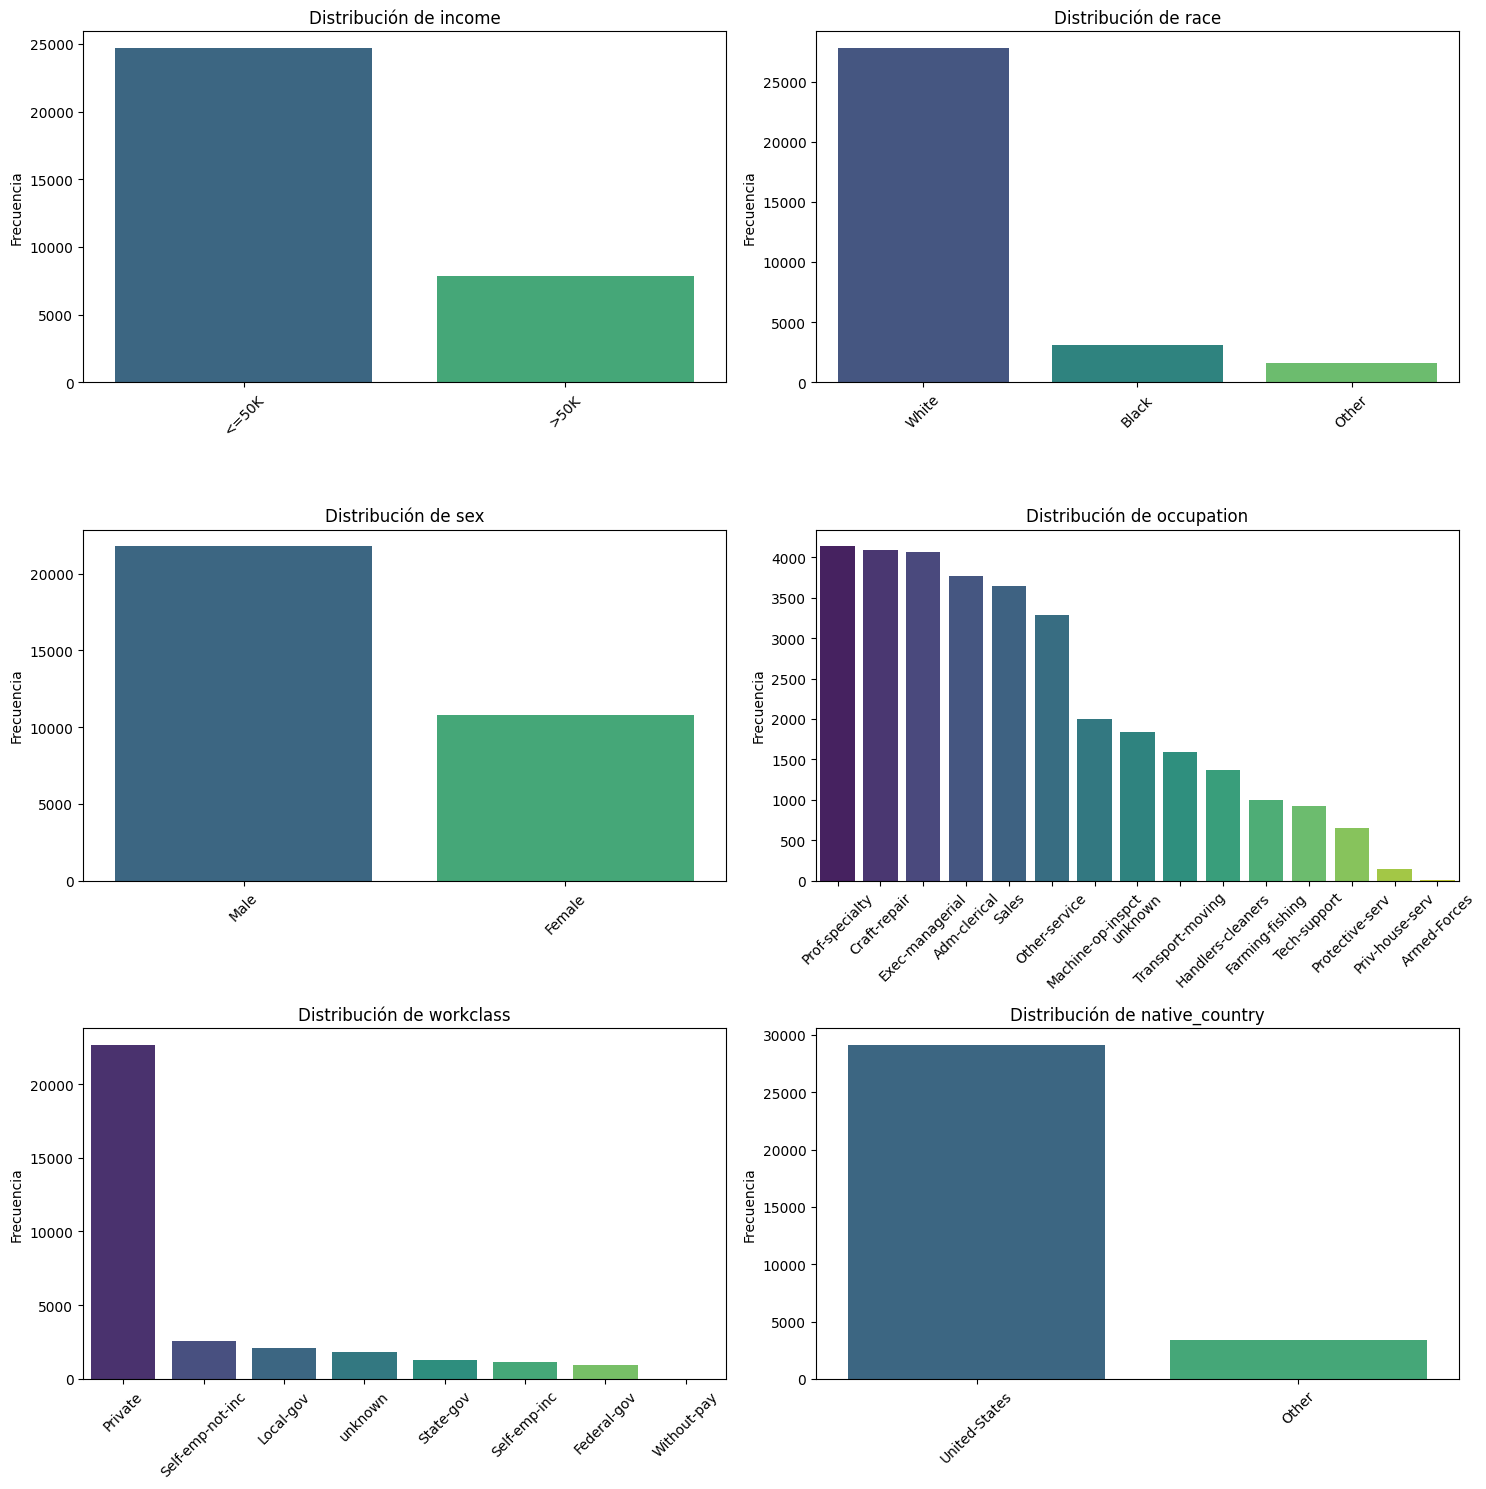

In [97]:
pinta_distribucion_categoricas(df,["income","race","sex","occupation","workclass","native_country"])

## "race" VS "income"

In [98]:
df.groupby("race")["income"].value_counts(normalize=True)*100

race   income
Black  <=50K     87.604100
       >50K      12.395900
Other  <=50K     79.197531
       >50K      20.802469
White  <=50K     74.401871
       >50K      25.598129
Name: proportion, dtype: float64

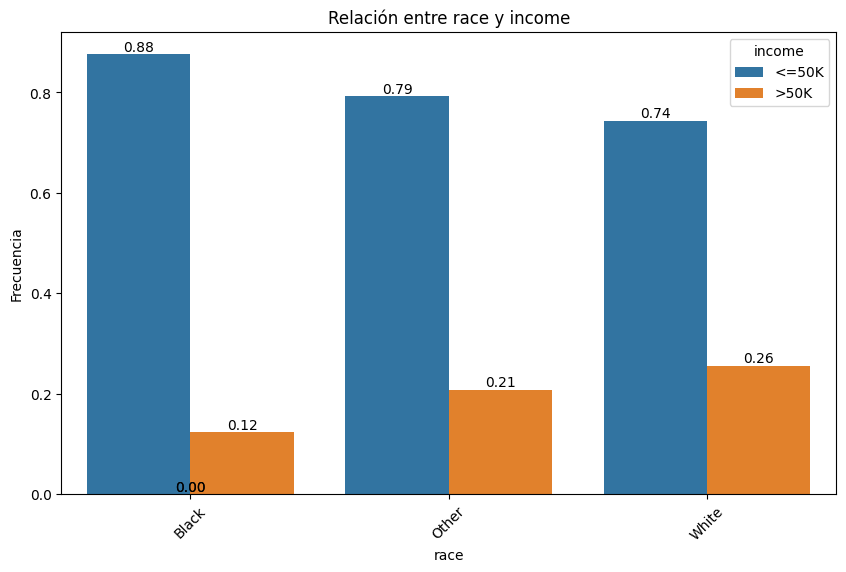

In [99]:
plot_categorical_relationship_fin(df,"race","income", relative_freq=True,show_values=True)

In [100]:
tabla_cont_race = tabla_contingencia(df,"race","income")
tabla_cont_race

income,<=50K,>50K
race,,
Black,2735,387
Other,1283,337
White,20680,7115


In [101]:
chi2, p, dof, expected = chi2_contingency(tabla_cont_race)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 277.59469843053785
P-Value: 5.261106981519217e-61
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 2369.82991671   752.17008329]
 [ 1229.70034115   390.29965885]
 [21098.46974214  6696.53025786]]


### Notes "race" VS "income"

* The majority of all racial groups earn <= 50K
* We see that the proportion of individuals earning more than 50K is lowest for Black individuals, followed by the group "other" and finally, White individuals have the higher proportion of individuals earning more than 50K
* The chi2 test, returns a p value of <0.001 which reaffirms the visual interpretation of the graph, showing a significant statistical association between the variables race and income.

## "sex" VS "income"

In [102]:
df.groupby("sex")["income"].value_counts(normalize=True)*100

sex     income
Female  <=50K     89.044787
        >50K      10.955213
Male    <=50K     69.414466
        >50K      30.585534
Name: proportion, dtype: float64

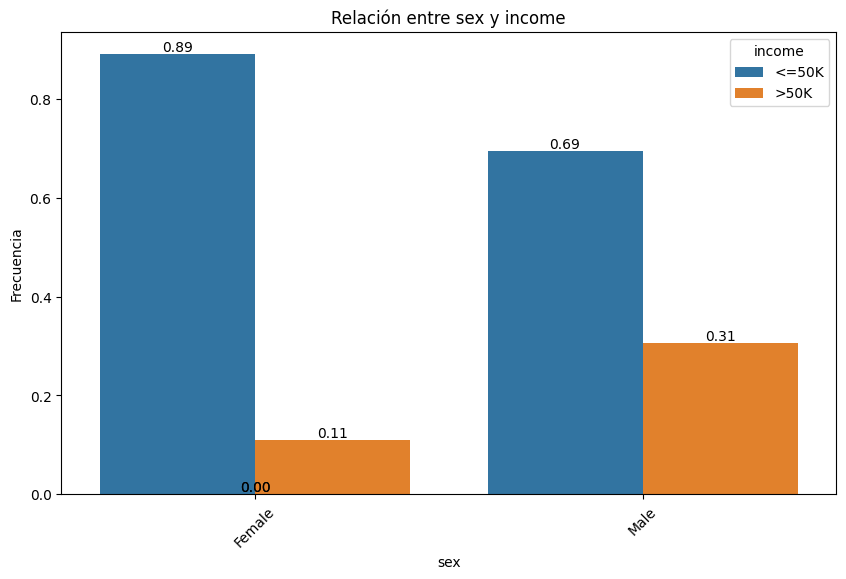

In [103]:
plot_categorical_relationship_fin(df,"sex","income",relative_freq=True,show_values=True)

In [104]:
tabla_cont_sex = tabla_contingencia(df,"sex","income")
tabla_cont_sex

income,<=50K,>50K
sex,,
Female,9583,1179
Male,15115,6660


In [105]:
chi2, p, dof, expected = chi2_contingency(tabla_cont_sex)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1516.5397108545465
P-Value: 0.0
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 8169.15745152  2592.84254848]
 [16528.84254848  5246.15745152]]


### Notes on "sex" VS "income"

* The graph shows that in both genders, the majority of individuals earn <=50K.
* However, it is clear that there is a much higher percentage of men (31%) that earn more than 50K than women(11%)
* The chi2 test reflects this observation, with a p-value of < 0.001, showing a significant statistical association.

## "occupation" VS "income"

In [106]:
df.groupby("occupation")["income"].value_counts(normalize=True)*100

occupation         income
Adm-clerical       <=50K     86.544586
                   >50K      13.455414
Armed-Forces       <=50K     88.888889
                   >50K      11.111111
Craft-repair       <=50K     77.308256
                   >50K      22.691744
Exec-managerial    <=50K     51.586716
                   >50K      48.413284
Farming-fishing    <=50K     88.407258
                   >50K      11.592742
Handlers-cleaners  <=50K     93.718042
                   >50K       6.281958
Machine-op-inspct  <=50K     87.550000
                   >50K      12.450000
Other-service      <=50K     95.837132
                   >50K       4.162868
Priv-house-serv    <=50K     99.319728
                   >50K       0.680272
Prof-specialty     <=50K     55.077369
                   >50K      44.922631
Protective-serv    <=50K     67.488444
                   >50K      32.511556
Sales              <=50K     73.068493
                   >50K      26.931507
Tech-support       <=50K     69.471413

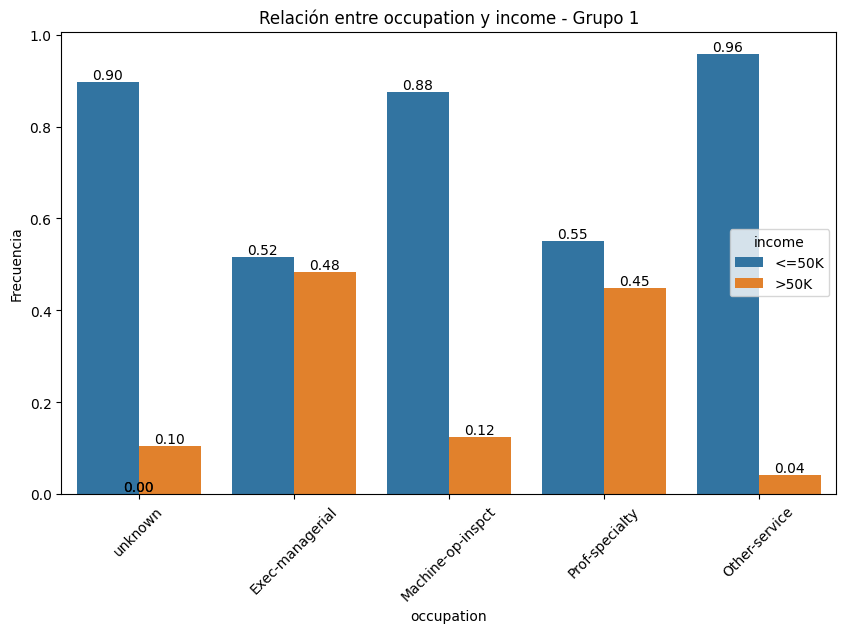

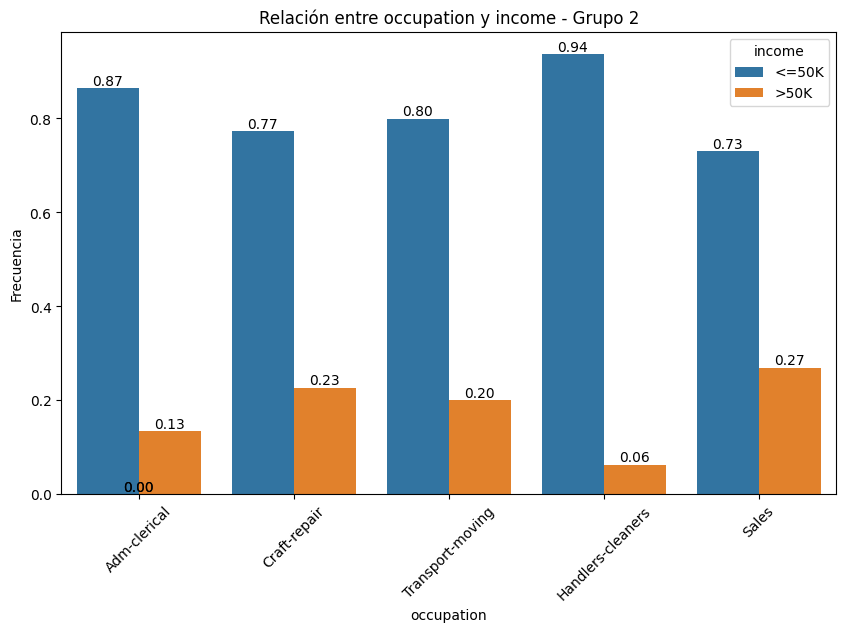

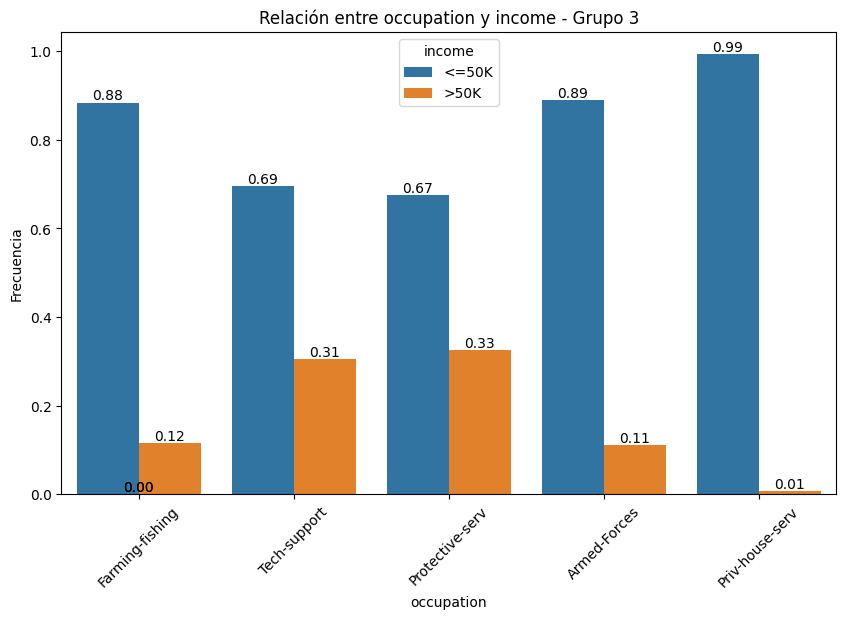

In [107]:
plot_categorical_relationship_fin(df,"occupation","income",relative_freq=True,show_values=True)

In [108]:
tabla_cont_occupation = tabla_contingencia(df,"occupation","income")
tabla_cont_occupation

income,<=50K,>50K
occupation,,
Adm-clerical,3261,507
Armed-Forces,8,1
Craft-repair,3165,929
Exec-managerial,2097,1968
Farming-fishing,877,115
Handlers-cleaners,1283,86
Machine-op-inspct,1751,249
Other-service,3154,137
Priv-house-serv,146,1


In [109]:
chi2, p, dof, expected = chi2_contingency(tabla_cont_occupation)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 4030.209207468489
P-Value: 0.0
Grados de Libertad: 14
Tabla de Frecuencias Esperadas:
 [[2.86019190e+03 9.07808095e+02]
 [6.83166856e+00 2.16833144e+00]
 [3.10765012e+03 9.86349879e+02]
 [3.08563697e+03 9.79363033e+02]
 [7.53001690e+02 2.38998310e+02]
 [1.03917270e+03 3.29827304e+02]
 [1.51814857e+03 4.81851431e+02]
 [2.49811347e+03 7.92886529e+02]
 [1.11583920e+02 3.54160802e+01]
 [3.13953124e+03 9.96468759e+02]
 [4.92639211e+02 1.56360789e+02]
 [2.77062114e+03 8.79378861e+02]
 [7.03661862e+02 2.23338138e+02]
 [1.21224163e+03 3.84758367e+02]
 [1.39897391e+03 4.44026093e+02]]


### Notes "occupation" VS "income"

* Inspecting the graphs, we notice some key patterns, such as certain occupations that have a high portion of individuals that earn >50K, and others that show a predominance in the lower income category.
* Occupations with a high portion of individuals that earn >50K include:
  + Exec-managerial (~48%)
  + Prof-specialty (~45%)
  + Tech-support (~31%)
  + Protective-serv (~33%)

This pattern is consistent with how higher-paying occupations typically require specialized skills,higher education and managerial responsibility

* Occupations with a high concentration in the lower income category include:
  + Priv-house-serv (~99% ≤50K)
  + Other-service (~96% ≤50K)
  + Handlers-cleaners (~94% ≤50K)
  + Machine-op-inspct (~88% ≤50K)
  + Farming-fishing (~88% ≤50K)
  + Adm-clerical (~87% ≤50K)

Lower-paying occupations often involve manual or service labor, have hourly wages instead of fixed salaries, and generally tend to offer fewer advancement opportunities.

## "workclass" VS "income"

In [110]:
df.groupby("workclass")["income"].value_counts(normalize=True)*100

workclass         income
Federal-gov       <=50K      61.354167
                  >50K       38.645833
Local-gov         <=50K      70.520784
                  >50K       29.479216
Private           <=50K      78.119349
                  >50K       21.880651
Self-emp-inc      >50K       55.734767
                  <=50K      44.265233
Self-emp-not-inc  <=50K      71.496063
                  >50K       28.503937
State-gov         <=50K      72.804314
                  >50K       27.195686
Without-pay       <=50K     100.000000
unknown           <=50K      89.636462
                  >50K       10.363538
Name: proportion, dtype: float64

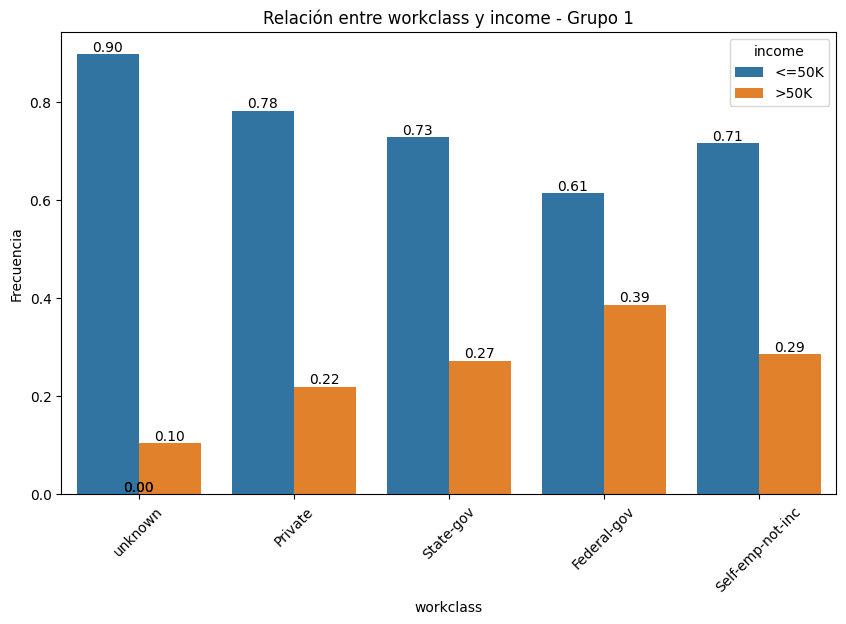

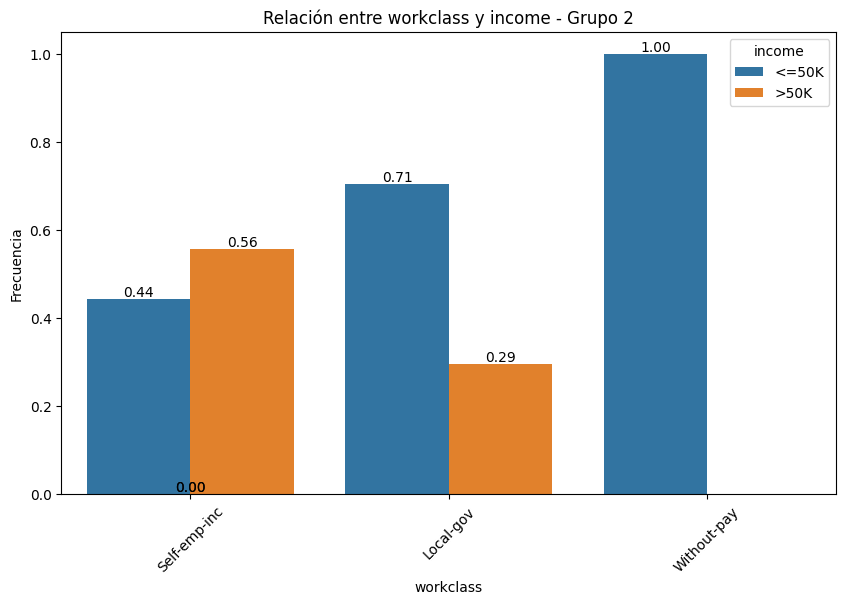

In [111]:
plot_categorical_relationship_fin(df,"workclass","income", relative_freq=True,show_values=True)

In [112]:
tabla_cont_workclass = tabla_contingencia(df,"workclass","income")
tabla_cont_workclass

income,<=50K,>50K
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Private,17712,4961
Self-emp-inc,494,622
Self-emp-not-inc,1816,724
State-gov,945,353
Without-pay,14,0
unknown,1652,191


In [113]:
chi2, p, dof, expected = chi2_contingency(tabla_cont_workclass)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1044.2834908729276
P-Value: 3.2486011755106817e-221
Grados de Libertad: 7
Tabla de Frecuencias Esperadas:
 [[7.28711313e+02 2.31288687e+02]
 [1.58874248e+03 5.04257522e+02]
 [1.72104913e+04 5.46250874e+03]
 [8.47126902e+02 2.68873098e+02]
 [1.92804868e+03 6.11951317e+02]
 [9.85278421e+02 3.12721579e+02]
 [1.06270400e+01 3.37296001e+00]
 [1.39897391e+03 4.44026093e+02]]


### Notes "workclass" VS "income"

* Observing the graphs, it is evident that there are categories in the workclass that have a noticeably larger share of high income individuals. These include:
    + self-emp-inc (self employed incorporated - business owners etc) (54%)
    + federal-gov ( has a higher portion of high income individuals than other gov positions)
    + state-gov
    + local-gov

The resoning behind this could be that self-emp-inc refers to business owners or larger scale operations. Whilst government jobs tend to offer a more stable employ in full time jobs with benefits etc. 

* Then we have categories that are dominated by lower income earners, such as: 
     + private
    + self-emp-not-inc (self employed not incorporated - freelancers, small business owners)
     + without pay

The reasoning for the lower income in these sectors could be due to private sector and non incorporated self employment jobs tend to include more lower wage or hourly jobs.
Whilst without pay naturally corresponds to lower income for obvious reasons.

## "native_country" VS "income"

In [114]:
df.groupby("native_country")["income"].value_counts(normalize=True)*100

native_country  income
Other           <=50K     80.200946
                >50K      19.799054
United-States   <=50K     75.409049
                >50K      24.590951
Name: proportion, dtype: float64

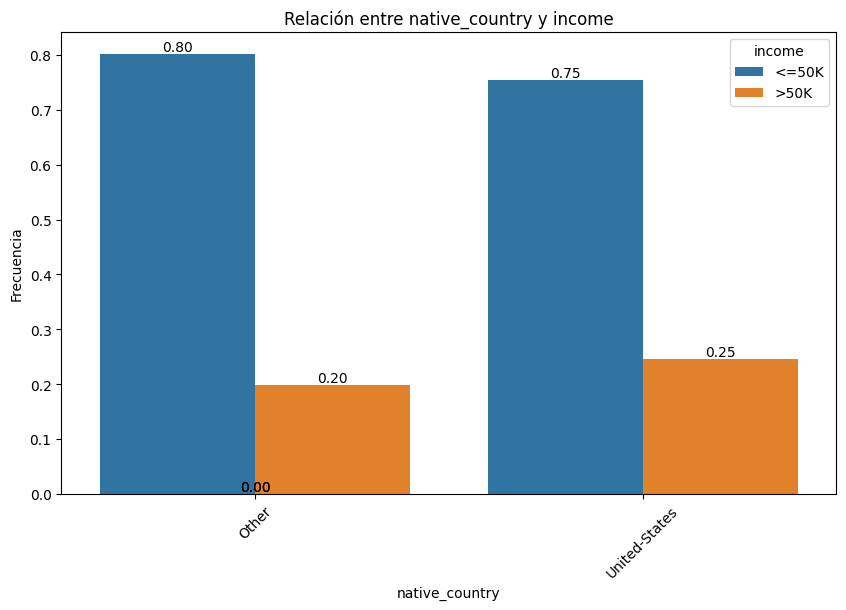

In [115]:
plot_categorical_relationship_fin(df,"native_country","income", relative_freq=True,show_values=True)

In [116]:
tabla_cont_country = tabla_contingencia(df,"native_country","income")
tabla_cont_country

income,<=50K,>50K
native_country,,
Other,2714,670
United-States,21984,7169


In [117]:
chi2, p, dof, expected = chi2_contingency(tabla_cont_country)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 37.80848904292614
P-Value: 7.804143463331444e-10
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[ 2568.70737929   815.29262071]
 [22129.29262071  7023.70737929]]


### Notes "native_country" VS "income"

* Observing the graphs the results appear to be quite similar, though it shows that the group whose native country is United States have a higher proportion of individuals that earn >50K.
* The chi2 test reaffirms that there is a significant statistical association and the results are not independant

# "has_capital_gain" VS "income"

In [118]:
df.groupby("has_capital_gain")["income"].value_counts(normalize=True)*100

has_capital_gain  income
No                <=50K     79.339480
                  >50K      20.660520
Yes               >50K      61.836283
                  <=50K     38.163717
Name: proportion, dtype: float64

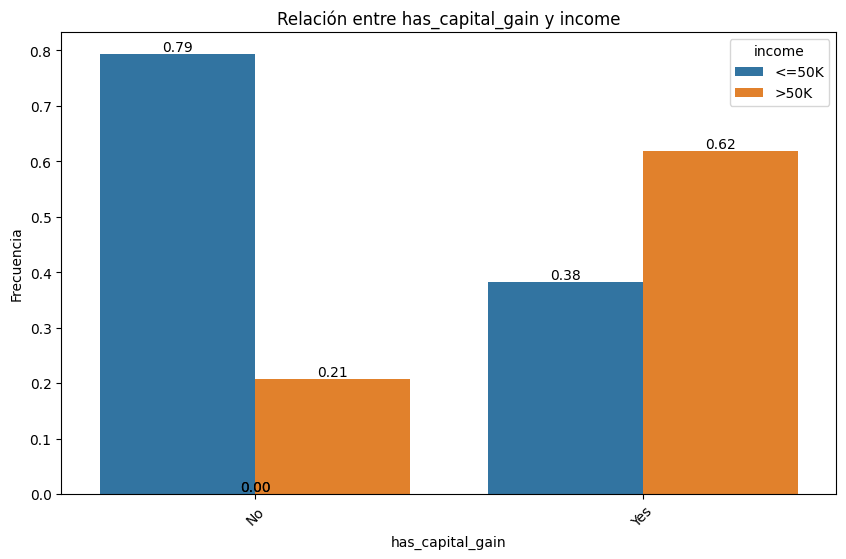

In [119]:
plot_categorical_relationship_fin(df,"has_capital_gain","income", relative_freq=True,show_values=True)

In [120]:
tabla_cont_gain = tabla_contingencia(df,"has_capital_gain","income")
tabla_cont_gain

income,<=50K,>50K
has_capital_gain,,
No,23663,6162
Yes,1035,1677


In [121]:
chi2, p, dof, expected = chi2_contingency(tabla_cont_gain)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 2302.417800784773
P-Value: 0.0
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[22639.39054  7185.60946]
 [ 2058.60946   653.39054]]


### Notes "has_capital_gain" VS "income"

* Observing the graph we see that the majority (79%) of individuals that do not have capital gain earn <=50K, with a small percentage(21%) earning >50K
* On the other hand, for the group of individuals that do have capital gain, we see that the majority (62%) of individuals earn >50K, with only 38% earning <=50K

In [122]:
df.groupby("marital_status")["income"].value_counts(normalize=True)*100

marital_status         income
Divorced               <=50K     89.574420
                       >50K      10.425580
Married-AF-spouse      <=50K     56.521739
                       >50K      43.478261
Married-civ-spouse     <=50K     55.310621
                       >50K      44.689379
Married-spouse-absent  <=50K     91.866029
                       >50K       8.133971
Never-married          <=50K     95.397019
                       >50K       4.602981
Separated              <=50K     93.560976
                       >50K       6.439024
Widowed                <=50K     91.440081
                       >50K       8.559919
Name: proportion, dtype: float64

# "marital_status" VS "income"

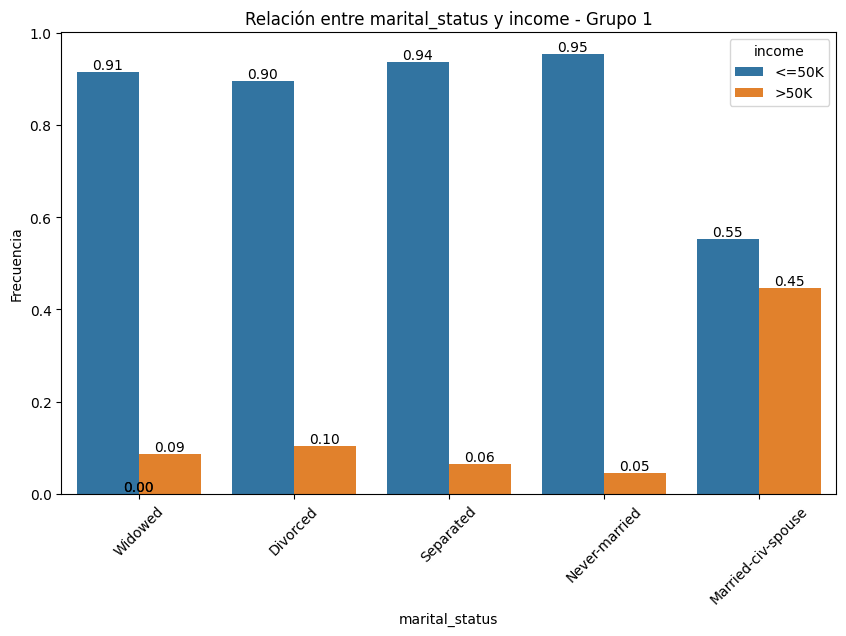

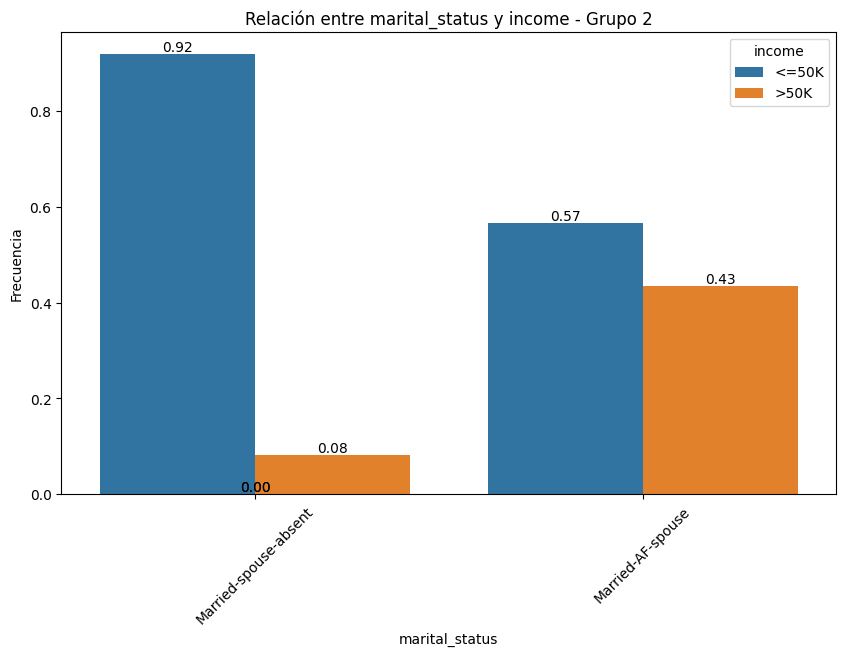

In [54]:
plot_categorical_relationship_fin(df,"marital_status","income",relative_freq=True,show_values=True)

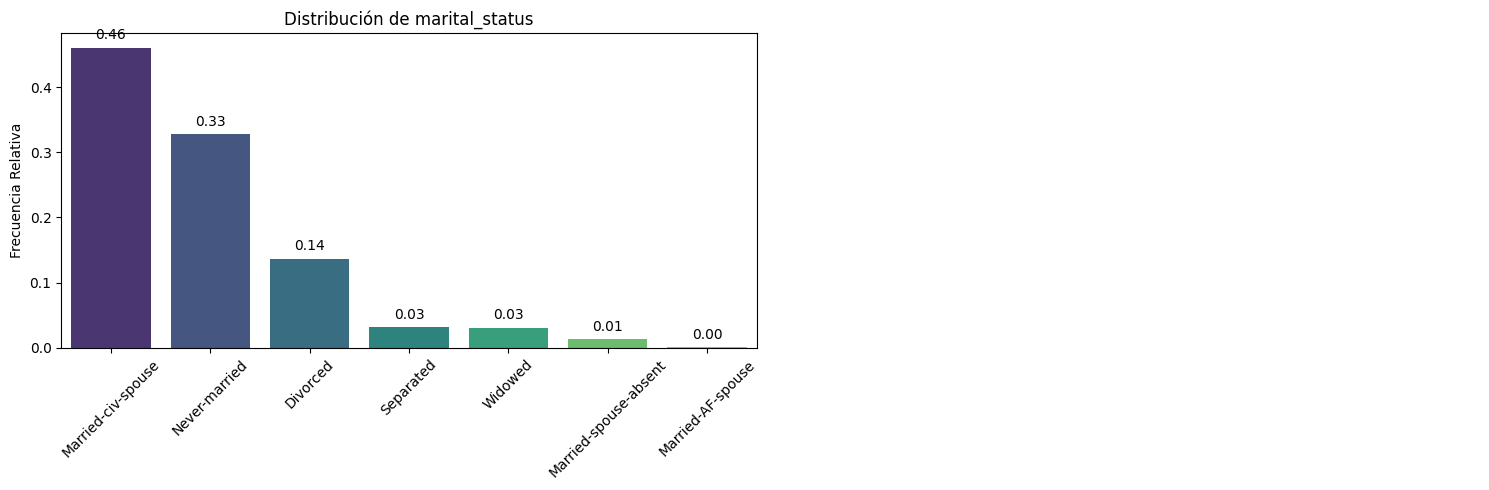

In [73]:
pinta_distribucion_categoricas(df,["marital_status"],relativa=True,mostrar_valores=True)

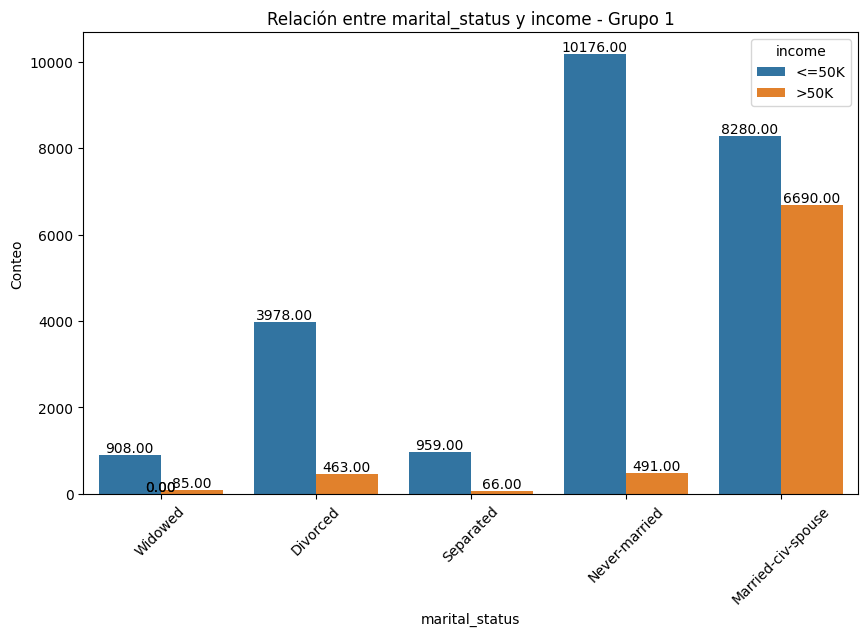

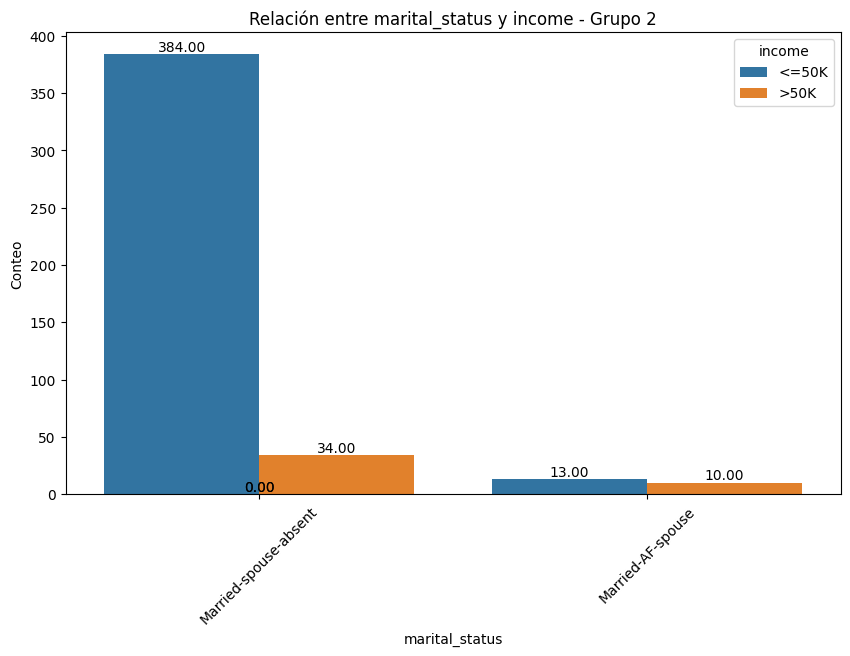

In [124]:
plot_categorical_relationship_fin(df,"marital_status","income",show_values=True)

In [52]:
tabla_cont_marital_status = tabla_contingencia(df,"marital_status","income")

In [53]:
chi2, p, dof, expected = chi2_contingency(tabla_cont_marital_status)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 6510.332126761207
P-Value: 0.0
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[3.37104890e+03 1.06995110e+03]
 [1.74587085e+01 5.54129145e+00]
 [1.13633420e+04 3.60665796e+03]
 [3.17293051e+02 1.00706949e+02]
 [8.09704539e+03 2.56995461e+03]
 [7.78051142e+02 2.46948858e+02]
 [7.53760765e+02 2.39239235e+02]]


### Notes "marital_status" VS "income"

* Analysing the relationship between marital status and income we see that there seem to be two groups that are associated with a larger portion of individuals earning >50K. Those groups are married-civ-spouse and married-AF-spouse
* This can be explained by understanding that marriage households often have two earners. The household resources are combined and or shared.
* Marriage is likely to be correlated with age, greater work experience and possibly career stability, all of which we have seen to be correlated with higher income.
* In the case of married-AF-spouse, some of the same assumptions can be made, however the results appear much greater because the size of the group is actually very small containing only a few individuals.